In [1]:
# Following exercises from this video: https://www.youtube.com/watch?v=89eYAAPyRfo&list=PLy3lFw0OTlutzXFVwttrtaRGEEyLEdnpy&index=4

In [26]:
# Importing necessary libraries
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
# Reading in dataset and storing it in variable
dataset_path = "/Users/trishulsathiyamoorthy/Desktop/data_analysis/covid19_analysis/covid.csv"
covid = pd.read_csv(dataset_path)
covid

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


In [4]:
# Finding total amount of nulls in dataset
covid.isnull().sum()

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

In [5]:
# Finding column types
covid.dtypes

Date         object
State        object
Region       object
Confirmed     int64
Deaths        int64
Recovered     int64
dtype: object

In [11]:
# Finding the time frame dataset was recorded through
covid["Date"] = pd.to_datetime(covid["Date"])
beginning = min(covid["Date"])
end = max(covid["Date"])

In [16]:
# Finding total recovered patients in each region
covid.groupby(covid["Region"])["Recovered"].sum()

Region
Afghanistan            252
Albania                455
Algeria               1702
Andorra                423
Angola                   7
                      ... 
West Bank and Gaza      71
Western Sahara           5
Yemen                    1
Zambia                  54
Zimbabwe                 5
Name: Recovered, Length: 187, dtype: int64

In [21]:
# Finding the region that had the most deaths on 4/29/20
region_with_most_deaths = covid.groupby(covid["Region"])["Deaths"].sum().idxmax()
region_with_most_deaths

'US'

In [23]:
region_with_fewest_recoveries = covid.groupby(covid["Region"])["Recovered"].sum().idxmin()
region_with_fewest_recoveries

'MS Zaandam'

In [36]:
# Find the total amount of deaths that have occurred in each state within the United States
us_cases = covid[covid["Region"] == "US"]
us_cases.groupby(us_cases["State"])["Deaths"].sum()

State
Alabama                           256
Alaska                              9
Arizona                           308
Arkansas                           57
California                       1946
Colorado                          766
Connecticut                      2169
Delaware                          144
Diamond Princess cruise ship        0
District of Columbia              205
Florida                          1218
Georgia                          1101
Grand Princess                      3
Guam                                5
Hawaii                             16
Idaho                              60
Illinois                         2215
Indiana                           964
Iowa                              148
Kansas                            134
Kentucky                          234
Louisiana                        1845
Maine                              52
Maryland                         1078
Massachusetts                    3405
Michigan                         3670
Minnes

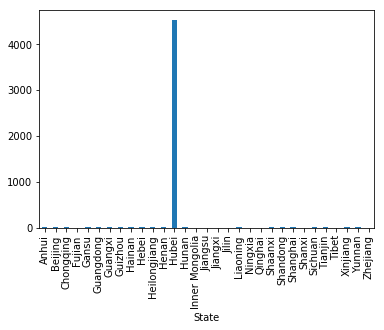

In [45]:
china_covid_data = covid[covid["Region"] == "Mainland China"]
china_covid_data.groupby("State")["Deaths"].sum().plot(kind="bar")